In [19]:
import pandas as pd
import numpy as np

print(pd.Series([1,2,3]))

0    1
1    2
2    3
dtype: int64


In [4]:

a_array=np.array([
    [1,2],
    [3,4]
])

a_df=pd.DataFrame(
    {'a':[1,3],
     'b':[2,4]}
)
print("numpy array:\n",a_array)
print('\npandas df:\n',a_df)

numpy array:
 [[1 2]
 [3 4]]

pandas df:
    a  b
0  1  2
1  3  4


# 1 Basic Operation
## 1.1 File Operation

Pandas can read data from Excel, txt, csv and even website

In [14]:
# read data from xsls
df=pd.read_excel('physical_examing_data.xlsx',index_col=0) # index_col use column as index
# df=pd.read_excel('physical_examing_data.xlsx')
df

# store xlsx data
df.loc[2,'体重']=1
print(df)
df.to_excel('modified_examing_data.xlsx')

pd=pd.read_excel('modified_examing_data.xlsx')
pd

    姓名   身高  体重   肺活量
学号                   
1   小明  168  60  3200
2   小黄  187   1  3800
3   小花  170  70  3400


,学号,姓名,身高,体重,肺活量
0,1,小明,168,60,3200
1,2,小黄,187,1,3800
2,3,小花,170,70,3400


In [23]:
# use Python to read data
with open('physical.csv','r',encoding='utf-8') as f:
    print(f.read())

# use pandas to read csv
# read csv can be also used to read txt file
df_csv=pd.read_csv('physical.csv',index_col=0)
df_csv

# store data to csv/txt
df_csv.to_csv('physical.txt')

# read from txt
df_txt=pd.read_csv('physical.txt')
df_txt

学号,姓名,身高,体重,肺活量
1,小明,168,60,3200
2,小黄,187,80,3800
3,小花,170,70,3400



,学号,姓名,身高,体重,肺活量
0,1,小明,168,60,3200
1,2,小黄,187,80,3800
2,3,小花,170,70,3400


## 2.1 Data in Pandas

1. Series
2. DataFrame

In [27]:
# data series

import pandas as pd

l=[11,22,33]
s=pd.Series(l)
print('list: ',l)
print('series:\n',s)

list:  [11, 22, 33]
series:
 0    11
1    22
2    33
dtype: int64


In [32]:
# pandas craete index for us, and we can mannully set the index
s=pd.Series(l,index=['a','b','c']) # use list to create series
print(s)

s=pd.Series({'a':1,'b,':2,'c':3})  # use dict to create series
print(s)

s=pd.Series(np.random.rand(3),index=['a','b','c']) # use numpy to create series
print(s)
# from pandas to numpy
print('array: ',s.to_numpy())
# from pandas to list
print('list: ',s.tolist())

a    11
b    22
c    33
dtype: int64
a     1
b,    2
c     3
dtype: int64
a    0.959669
b    0.015147
c    0.659734
dtype: float64
array:  [0.95966885 0.0151474  0.65973353]
list:  [0.9596688547063419, 0.015147401498772917, 0.6597335257614889]


In [33]:
# data frame
df=pd.DataFrame([
    [1,2],
    [3,4]
])

print(df)

   0  1
0  1  2
1  3  4


In [35]:
# access data
print(df.at[0,1])

# set index while creating DataFrame
df=pd.DataFrame({'col1':[1,3],'col2':[2,4]})
print(df)

2
   col1  col2
0     1     2
1     3     4


In [38]:
# get Series from DataFrame
print(df['col1'],'\n')
print('data type: ',type(df['col1']))

s=pd.Series([1.0,2.0,3.0],index=['a','b','c'])
df=pd.DataFrame({'col1':[1,3],'col2':[2,4]},index=['a','b'])
print(s,'\n')
print(df)

0    1
1    3
Name: col1, dtype: int64 

data type:  <class 'pandas.core.series.Series'>
a    1.0
b    2.0
c    3.0
dtype: float64 

   col1  col2
a     1     2
b     3     4


In [39]:
print(df.index,'\n') # index is row
print(df.columns)

Index(['a', 'b'], dtype='object') 

Index(['col1', 'col2'], dtype='object')


In [40]:
# create from json
my_json_data=[
    {'age':12,'height':111},
    {'age':13, 'height':123}
]

df=pd.DataFrame(my_json_data,index=['Jack','Rose'])
print(df)

      age  height
Jack   12     111
Rose   13     123


## 1.3 select data from pandas


In [2]:
import numpy as np
import pandas as pd

data=np.arange(-12,12).reshape((6,4))
df=pd.DataFrame(
    data,
    index=list('abcdef'),
    columns=list('ABCD')
)

df

,A,B,C,D
a,-12,-11,-10,-9
b,-8,-7,-6,-5
c,-4,-3,-2,-1
d,0,1,2,3
e,4,5,6,7
f,8,9,10,11


In [12]:
# select colume
print(df['B'])

# select like Excel: loc
print(data[2:3,1:3])
print(df.loc['c':'d','B':'D']) # it will include 'd', and 'D', while numpy will not

# select like numpy: iloc
print('numpy data:\n',data[2:3,1:3])
print('\npandas data:\n',df.iloc[2:3,1:3]) # usd number instead of index or column

a   -11
b    -7
c    -3
d     1
e     5
f     9
Name: B, dtype: int64
[[-3 -2]]
   B  C  D
c -3 -2 -1
d  1  2  3
numpy data:
 [[-3 -2]]

pandas data:
    B  C
c -3 -2


In [14]:
row_lables=df.index[2:4] # get index
print(row_lables)

print('\ndf:\n',df.loc[row_lables,['A','C']])

Index(['c', 'd'], dtype='object')

df:
    A  C
c -4 -2
d  0  2


In [16]:
df[df['A']<0] # select all rows whose A < 0

,A,B,C,D
a,-12,-11,-10,-9
b,-8,-7,-6,-5
c,-4,-3,-2,-1


In [21]:
print(df)
print(df.iloc[0])

print('\n')
print(df.loc[:,df.iloc[0]<-10]) # first row data < -10

    A   B   C   D
a -12 -11 -10  -9
b  -8  -7  -6  -5
c  -4  -3  -2  -1
d   0   1   2   3
e   4   5   6   7
f   8   9  10  11
A   -12
B   -11
C   -10
D    -9
Name: a, dtype: int64


    A   B
a -12 -11
b  -8  -7
c  -4  -3
d   0   1
e   4   5
f   8   9


In [24]:
list_data=list(range(-4,4))
print(list_data)

s=pd.Series(
    list_data,
    index=list('abcdefgh')
)

print(s)

print(s.loc[['a','b','c']]) # location
print(s.iloc[[1,2,3]])  # index location

[-4, -3, -2, -1, 0, 1, 2, 3]
a   -4
b   -3
c   -2
d   -1
e    0
f    1
g    2
h    3
dtype: int64
a   -4
b   -3
c   -2
dtype: int64
b   -3
c   -2
d   -1
dtype: int64


# 2 Statistical display
## 2.1 Basic statistical methods
1. mean, median
2. sum,prod
3. max,min
4. innull,notnull,dropna,fillna
5. idxmin,idxmax

In [26]:
# quick show DataFrame info
print(df)
df.describe()

    A   B   C   D
a -12 -11 -10  -9
b  -8  -7  -6  -5
c  -4  -3  -2  -1
d   0   1   2   3
e   4   5   6   7
f   8   9  10  11


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-2.000000,-1.000000,0.000000,1.000000
std,7.483315,7.483315,7.483315,7.483315
min,-12.000000,-11.000000,-10.000000,-9.000000
25%,-7.000000,-6.000000,-5.000000,-4.000000
50%,-2.000000,-1.000000,0.000000,1.000000
75%,3.000000,4.000000,5.000000,6.000000
max,8.000000,9.000000,10.000000,11.000000


In [30]:
print(df.mean()) # calculate mean of each column
print(df.mean(axis=1)) # calculate mean of each row

s=pd.Series([1000,2000,4000,100000])
print(s.median()) # median

A   -2.0
B   -1.0
C    0.0
D    1.0
dtype: float64
a   -10.5
b    -6.5
c    -2.5
d     1.5
e     5.5
f     9.5
dtype: float64
3000.0


In [36]:
df=pd.DataFrame(np.arange(12).reshape((4,3)),columns=['c0','c1','c2'])
print(df)

print('sum:\n',df.sum()) # calculate sum of each column
print('sum:\n',df.sum(axis=1)) # calculate sum of each row

print('prod:\n',df.prod())
print('prod:\n',df.prod(axis=1))



   c0  c1  c2
0   0   1   2
1   3   4   5
2   6   7   8
3   9  10  11
sum:
 c0    18
c1    22
c2    26
dtype: int64
sum:
 0     3
1    12
2    21
3    30
dtype: int64
prod:
 c0      0
c1    280
c2    880
dtype: int64
prod:
 0      0
1     60
2    336
3    990
dtype: int64


In [38]:
# max
print('max:\n',df.max())
print('max:\n',df.max(axis=1))

# min
print('min:\n',df.min())
print('min:\n',df.min(axis=1))

max:
 c0     9
c1    10
c2    11
dtype: int64
max:
 0     2
1     5
2     8
3    11
dtype: int64
min:
 c0    0
c1    1
c2    2
dtype: int64
min:
 0    0
1    3
2    6
3    9
dtype: int64


In [39]:
# deal with None
df = pd.DataFrame(
    [[1, 2, 3, 0],
    [3, 4, None, 1],
    [None, None, None, None],
    [None, 3, None, 4]],
    columns=list("ABCD")
)

print(df)

print('\nisnull:\n',df.isnull()) # Trus means None
print('\nisnull:\n',df.isnull()) # Trus means not None

     A    B    C    D
0  1.0  2.0  3.0  0.0
1  3.0  4.0  NaN  1.0
2  NaN  NaN  NaN  NaN
3  NaN  3.0  NaN  4.0

isnull:
        A      B      C      D
0  False  False  False  False
1  False  False   True  False
2   True   True   True   True
3   True  False   True  False

isnull:
        A      B      C      D
0  False  False  False  False
1  False  False   True  False
2   True   True   True   True
3   True  False   True  False


In [43]:
# drop none
print('\ndropna:\n',df.dropna(axis=0))
print('\n',df)

print('\n',df.dropna(axis=1))


dropna:
      A    B    C    D
0  1.0  2.0  3.0  0.0

      A    B    C    D
0  1.0  2.0  3.0  0.0
1  3.0  4.0  NaN  1.0
2  NaN  NaN  NaN  NaN
3  NaN  3.0  NaN  4.0

 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


In [47]:
# index
print('max_index:\n %s\n' % df.idxmax())
print('max_index:\n %s\n' % df.idxmax(axis=1))
print('min_index:\n %s\n' % df.idxmin())

max_index:
 A    1
B    1
C    0
D    3
dtype: int64

max_index:
 0      C
1      B
2    NaN
3      D
dtype: object

min_index:
 A    0
B    0
C    0
D    0
dtype: int64



## 2.2 Draw a chart
1. scatter
2. plot
3. var
4. histogram
5. pie
6. area

             x         y
0     1.670942 -0.007290
1     0.289705 -0.489436
2     1.610777  0.723342
3    -2.000761 -1.292875
4     0.183494 -0.749531
...        ...       ...
1019 -1.642002 -0.274045
1020  1.832120  0.416557
1021  0.147389 -0.053902
1022 -1.145520  0.604756
1023  1.147145  1.449796

[1024 rows x 2 columns]


<AxesSubplot:xlabel='x', ylabel='y'>

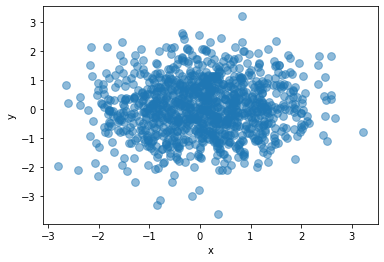

In [51]:
# scatter plot

n=1024
df=pd.DataFrame({
    'x':np.random.normal(0,1,n),
    'y':np.random.normal(0,1,n)
})

print(df)
color=np.arctan2(df['y'],df['x'])

# c: color
# s: size for each dot
# alpha: opacity
# cmap: color map
df.plot.scatter(x='x',y='y',c=color,s=60,alpha=0.5,cmap='rainbow')


TypeError: Got both 'c' and 'color', which are aliases of one another

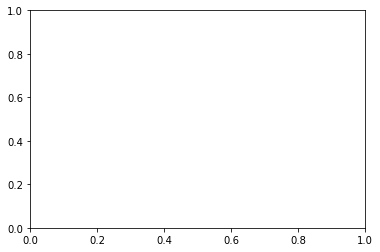

In [53]:
## line chart: plot
n=20
x=np.linspace(-1,1,n)

y=x*2+0.4+np.random.normal(0,0.3,n)

df=pd.DataFrame({
    'x':x,
    'y':y
})

df.plot(x='x',y='y',alpha=0.5,c='r')